In [2]:
import matplotlib.pyplot as plt
import numpy as np

/zeus/dominik/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

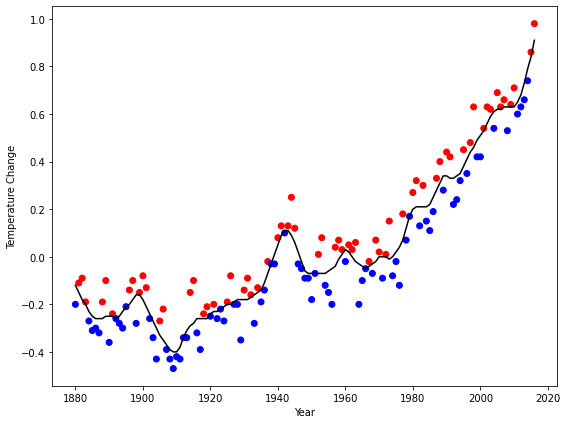

In [6]:
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt", "nasa-giss.txt"
)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ngiss = np.loadtxt("nasa-giss.txt")
ax.plot(ngiss[:, 0], ngiss[:, 2], color="black")
colors = np.full_like(ngiss[:, 1], "red", dtype=str)
colors[ngiss[:, 1] <= ngiss[:, 2]] = "blue"
ax.scatter(ngiss[:, 0], ngiss[:, 1], c=colors)

ax.set_xlabel("Year")
ax.set_ylabel("Temperature Change")
fig.tight_layout()

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [7]:
x = np.linspace(0, 2 * np.pi, 100)
f = np.sin(x) + np.cos(x) ** 2
fd = (f[1:] - f[:-1]) / (x[1] - x[0])
fdd = (fd[1:] - fd[:-1]) / (x[1] - x[0])

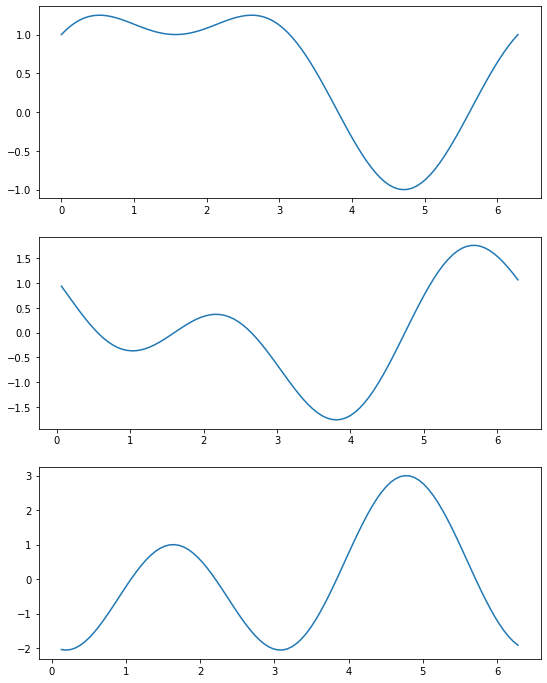

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(9, 12))
ax[0].plot(x, f)
ax[1].plot(x[1:], fd)
ax[2].plot(x[2:], fdd)

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [22]:
with open("shore_leave.txt", "r") as f:
    words = f.read().replace(",", "").replace(".", "").lower().split()
    words = {w: words.count(w) for w in words}
words = sorted(words.items(), key=lambda x: x[1], reverse=True)

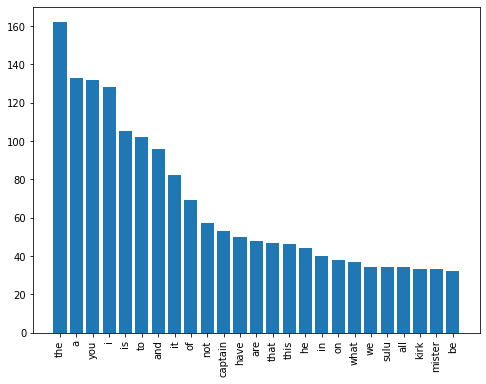

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(25), [word[1] for word in words[:25]])
_ = ax.set_xticks(range(25), labels=[word[0] for word in words[:25]], rotation=90)

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [3]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

In [4]:
c = xv + 1j * y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c

m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

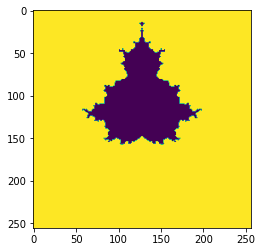

In [5]:
fig, ax = plt.subplots()
ax.imshow(m)

/tmp/ipykernel_1274724/4003242311.py:15: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_1274724/4003242311.py:15: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


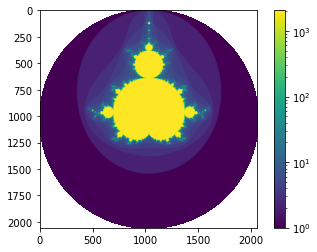

In [32]:
from matplotlib.colors import LogNorm

N = 2056
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

c = xv + 1j * y

z = np.zeros((N, N), dtype=np.complex128)
iterations = np.zeros((N, N), dtype=np.int64)

for i in range(2056):
    z = z**2 + c
    iterations[np.abs(z) <= 2] += 1
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

fig, ax = plt.subplots()

im = ax.imshow(iterations, norm=LogNorm())
fig.colorbar(im)

## Q8: Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib

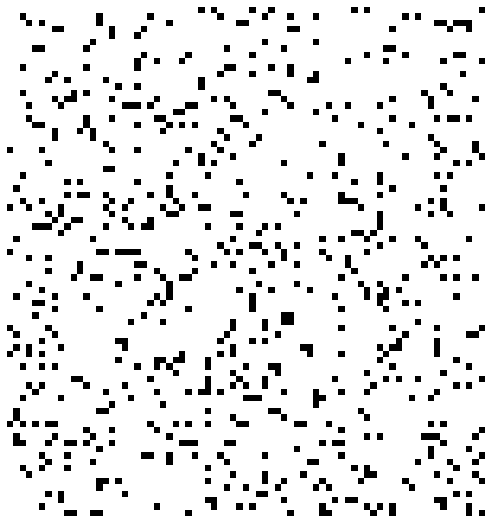

In [7]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from gol_project_dominp import game_of_life  # see L08

dims = (80, 75)
grids = game_of_life(dims, 100)
fig, ax = plt.subplots(figsize=(10 * (dims[0] / dims[1]), 10 * dims[1] / dims[0]))


def animate(i):
    ax.clear()
    ax.matshow(grids[i], cmap="binary")
    ax.axis("off")
    return ax


anim = FuncAnimation(fig, animate, frames=len(grids), interval=200, repeat=True)
HTML(anim.to_jshtml())